In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/FOOD/TRAIN'
test_path = '/content/drive/MyDrive/FOOD/TEST'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


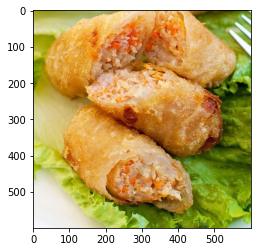

In [ ]:
img = load_img('/content/drive/MyDrive/FOOD/TRAIN/CHAGIO/IMG_5714.JPG')
plt.imshow(img)

In [ ]:
DATADIR = '/content/drive/MyDrive/FOOD'

In [ ]:
cv2.imread('/content/drive/MyDrive/FOOD/TRAIN/CHAGIO/IMG_5714.JPG').shape

(600, 600, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_TRAIN = ImageDataGenerator(rescale=1/255)
X_TEST = ImageDataGenerator(rescale=1/255)

In [ ]:
TRAIN = X_TRAIN.flow_from_directory(directory=r"/content/drive/MyDrive/FOOD/TRAIN",target_size=(300, 300),batch_size=30,class_mode="categorical",color_mode="rgb",)
TEST  = X_TEST.flow_from_directory(directory=r"/content/drive/MyDrive/FOOD/TEST",target_size=(300, 300),batch_size=30,class_mode="categorical",color_mode="rgb",)

Found 502 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
TRAIN.class_indices

{'BANHCHUNG': 0,
 'BANHMI': 1,
 'BANHXEO': 2,
 'BONE': 3,
 'CAVIENCHIEN': 4,
 'CHAGIO': 5,
 'COMTAM': 6,
 'HOTVITLON': 7,
 'PHO': 8,
 'XOI': 9}

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(300,300,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(250,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 13)      364       
                                                                 
 conv2d_7 (Conv2D)           (None, 300, 300, 4)       472       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 4)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_18 (Dense)            (None, 100)               9000100   
                                                                 
 dense_19 (Dense)            (None, 1000)              101000    
                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(TRAIN,epochs=50,batch_size=20,verbose=1,validation_data=TEST)

Epoch 1/50
17/17 [==============================] - 52s 3s/step - loss: 6.4619 - accuracy: 0.1315 - val_loss: 2.0140 - val_accuracy: 0.1600
Epoch 2/50
17/17 [==============================] - 53s 3s/step - loss: 2.1269 - accuracy: 0.2052 - val_loss: 1.8650 - val_accuracy: 0.3500
Epoch 3/50
17/17 [==============================] - 51s 3s/step - loss: 1.6442 - accuracy: 0.4602 - val_loss: 1.4620 - val_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 51s 3s/step - loss: 0.8409 - accuracy: 0.7450 - val_loss: 1.3559 - val_accuracy: 0.5900
Epoch 5/50
17/17 [==============================] - 51s 3s/step - loss: 0.2212 - accuracy: 0.9482 - val_loss: 1.9742 - val_accuracy: 0.5300
Epoch 6/50
17/17 [==============================] - 51s 3s/step - loss: 0.0543 - accuracy: 0.9940 - val_loss: 1.4852 - val_accuracy: 0.6300
Epoch 7/50
17/17 [==============================] - 51s 3s/step - loss: 0.0240 - accuracy: 0.9960 - val_loss: 1.4464 - val_accuracy: 0.6500
Epoch 8/50
17/17 [==

In [ ]:
model.save('Food.h5')

In [ ]:
score=model.evaluate(TEST,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

4/4 [==============================] - 4s 744ms/step - loss: 2.0021 - accuracy: 0.6500
Test loss= 2.0021274089813232
Test accuracy= 0.6499999761581421


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

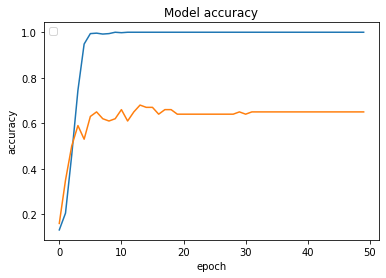

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
Hello_OPENLAB = load_model('/content/Food.h5')

In [ ]:
labels = {0: 'BANHCHUNG', 1: 'BANHMI', 2: 'BANHXEO', 3: 'BONE', 4: 'CAVIENCHIEN', 5: 'CHAGIO', 6: 'COMTAM', 7: 'HOTVITLON', 8: 'PHO', 9: 'XOI'}

This is:  BANHCHUNG


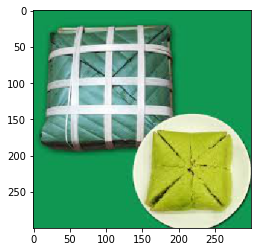

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/1.jpg', target_size =(300,300))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  BANHMI


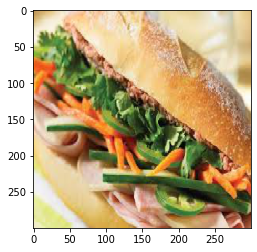

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/2.jpg', target_size =(300,300))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  BANHXEO


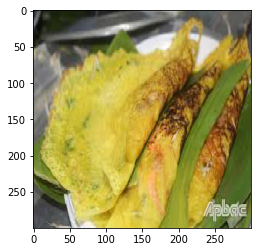

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/3.jpg', target_size =(300,300))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])